![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 1. Tokenization

Tokenization is a fundamental principle in natural language processing (NLP) that plays a crucial role in enabling language models to comprehend written information. It entails breaking down textual inputs into individual units called tokens, forming the foundation for effectively understanding and processing language by neural networks. In the previous lesson, we introduced the concept of tokens as a means to define the input for language models (LLMs).

The context length of the model is a frequently discussed characteristic among language models. As an example, the GPT-3.5 model has a context length of 4096 tokens, covering both the tokens in the prompt and the subsequent completion. Due to this constraint, it is advisable to be mindful of token usage when making requests to language models. Nonetheless, various approaches exist to tackle this challenge when dealing with long-form inputs or multiple documents. These methods include breaking up a lengthy prompt into smaller segments and sending requests sequentially, or alternatively, submitting independent requests for each document and merging the responses in a final step. We will discuss these approaches in more detail throughout the course.

Now, let's delve deeper into what exactly tokens represent and their significance in this context. The tokenization process involves creating a systematic pipeline for transforming words into tokens. However, it is crucial to provide a clear understanding of what exactly tokens represent in this context. Researchers have incorporated three distinct encoding approaches into their studies. The following figure showcases a sample of each approach for your reference.

1. **Character Level:** Consider each character in a text as a token.
2. **Word Level:** Encoding each word in the corpus as one token.
3. **Subword Level:** Breaking down a word into smaller chunks when possible. For example, we can encode the word “basketball” to the combination of two tokens as “basket” + “ball”.

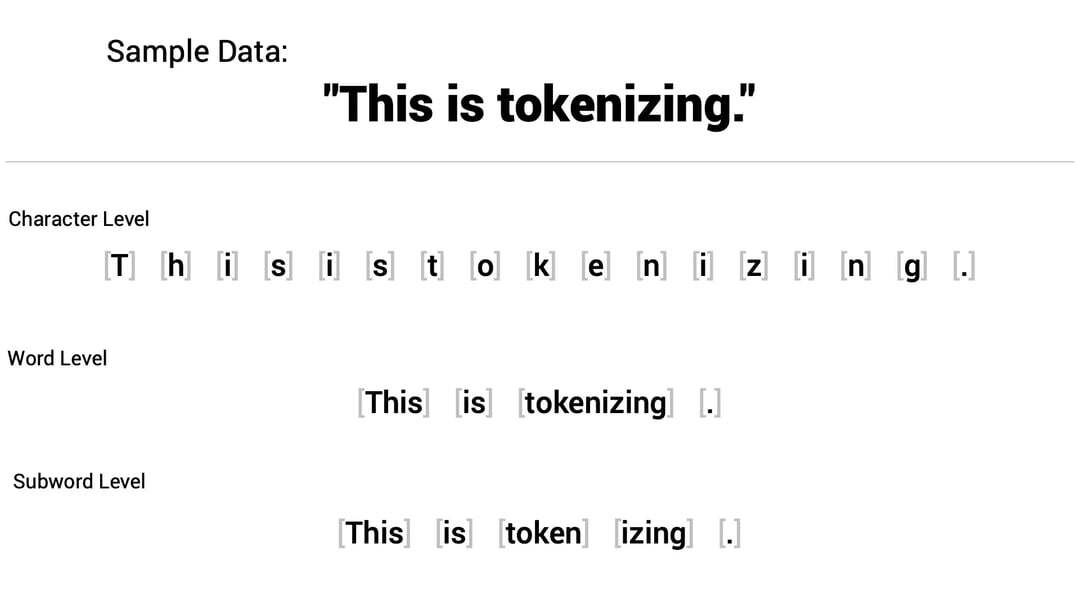

In [1]:
# Tokenization

from IPython import display
display.Image("data/images/GenAI-01-Tokenization.jpg")

Subword-level encoding offers increased flexibility and reduces the number of required unique tokens to represent a corpus. This approach enables the combination of different tokens to represent new words, eliminating the need to add every new word to the dictionary. This technique proved to be the most effective encoding when training neural networks and LLMs. Well-known models like GPT family, LLaMA employ this tokenization method. Therefore, our sole focus will be on one of its specific variants, known as **Byte Pair Encoding (BPE)**. It is worth mentioning that other subword level algorithms exist, such as **WordPiece** and **SentencePiece**, which are used in practice. However, we will not delve into their specifics in this discussion. Nevertheless, it is important to note that while their token selection methods may differ, the fundamental process remains the same.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 2. Byte Pair Encoding (BPE)

It is an iterative process to extract the most repetitive words or subwords in a corpus. The algorithm starts by counting the occurrence of each character and builds on top of it by merging the characters. It is a greedy process that carefully considers all possible combinations to identify the optimal set of words/subwords that covers the dataset with the least number of required tokens.

The next step involves creating the vocabulary for our model, which consists of a comprehensive dictionary comprising the most frequently occurring tokens extracted by BPE (or another technique of your choosing) from the dataset. The definition of a dictionary (`dict` type) is a data structure that holds a key and value pair for each row. In our particular scenario, each data point is assigned a key represented by an index that begins from 0, while the corresponding value is a token.

Due to the fact that neural networks only accept numerical inputs, we can utilize the vocabulary to establish a mapping between tokens and their corresponding IDs, like a lookup table. We have to save the vocabulary for future use cases to be able to decode the model's output from the IDs to words. This is known as a pre-trained vocabulary, an essential component accompanying published pre-trained models. Without the vocabulary, understanding the model's output (the IDs) would be impossible. For smaller models like BERT, the dictionary can consist of as few as 30K tokens, while larger models like GPT-3 can expand to encompass up to 50K tokens.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 3. Tokens and Cost

There is a direct correlation between the tokens and the cost in most proprietary APIs like OpenAI. It is crucial to highlight that the prices will fall into two categories: the number of tokens in the prompt and the completion (the model's generation), with the completion typically incurring higher costs. For example, at the time of writing this lesson, GPT-4 will cost \$0.03 per 1000 tokens for processing your inputs, and \$0.06 per 1000 tokens for generation process. As we saw in the previous lesson, you can use the `get_openai_callback` method from LangChain to get the exact cost, or do the tokenization process locally and keep track of number of tokens as we see in the next section. For a rough estimation, as a general rule, OpenAI regards 1000 tokens to be approximately equal to 750 words.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 4. Tokenizers In Action

In this section, we provide the codes to load the pre-trained tokenizer for the GPT-2 model from the Huggingface Hub using the transformers package.

In [2]:
!pip3 install transformers

In [5]:
from transformers import AutoTokenizer

# Download and load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("gpt2")

The code snippet above will grab the tokenizer and load the dictionary, so you can simply use the `tokenizer` variable to encode/decode your text. But before we do that, let's take a look at what the vocabulary contains.

In [7]:
print( tokenizer.vocab )

{'between': 23395, 'jab': 27935, 'ĠTorch': 34868, 'ĠRune': 28228, 'ĠArgentina': 16519, 'Ġfraudulent': 24627, 'ĠHolding': 31703, 'cedes': 19285, 'Line': 13949, 'ĠRelease': 13868, 'Ġplatoon': 39368, 'Ġnavigate': 16500, 'ĠAe': 37532, 'Ġassassination': 18898, 'Ġinfringement': 23059, 'ĠMaz': 21625, 'Ġcalibrated': 48050, 'utherford': 46923, 'Ġbeacon': 34538, 'Ġmotorists': 32688, 'LLOW': 44765, 'ustain': 19542, 'Ġcompatible': 11670, 'Ġvocal': 12435, 'istas': 37503, 'idge': 3130, 'timeout': 48678, 'icians': 5106, 'Allows': 34934, 'othe': 20388, 'Ġrear': 8286, 'ĠMubarak': 46544, 'Ġdreamed': 27947, '------------------------': 22369, '361': 35195, 'Ġslowly': 6364, 'ipt': 10257, 'Ġposting': 10754, 'WD': 22332, 'Inside': 24441, 'Ġfooth': 36522, 'Ġcreed': 43514, 'ĠDevice': 16232, 'Ġdestructive': 17656, 'stros': 48288, 'alys': 26266, 'ĠConstantine': 44665, 'ster': 1706, 'URES': 29514, 'Education': 41183, 'cano': 35490, 'ensitivity': 40545, 'Ġfacilitates': 42699, 'antly': 3875, 'Share': 11649, 'Ġdiscl

As you can see, each entry is a pair of token and ID. For example, we can represent the word optional with the number 11902. You might have noticed a special character, Ġ, preceding certain tokens. This character represents a space. The next code sample will use the `tokenizer` object to convert a sentence into tokens and IDs.

In [8]:
token_ids = tokenizer.encode("This is a sample text to test the tokenizer.")

print(f"Tokens: {tokenizer.convert_ids_to_tokens(token_ids)}")
print(f"Token IDs: {token_ids}")

Tokens: ['This', 'Ġis', 'Ġa', 'Ġsample', 'Ġtext', 'Ġto', 'Ġtest', 'Ġthe', 'Ġtoken', 'izer', '.']
Token IDs: [1212, 318, 257, 6291, 2420, 284, 1332, 262, 11241, 7509, 13]


The `.encode()` method can convert any given text into a numerical representation, a list of integers. To further investigate the process, we can use the `.convert_ids_to_tokens()` function that shows the extracted tokens. As an example, you can observe that the word "tokenizer" has been split into a combination of "token" + "izer" tokens.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

In [ ]:
# Deep Learning as subset of ML

from IPython import display
display.Image("data/images/DL_01_Intro-01-DL-subset-of-ML.jpg")

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)